In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!ls '/content/drive/My Drive/CVAssignment3/'

Image_Classification_using_CNN.ipynb  Load_Saved_model.ipynb  my_model.h5  Rice


In [3]:
model_path = '/content/drive/My Drive/CVAssignment3/'

In [4]:
from tensorflow import keras


model = keras.models.load_model(model_path+'my_model.h5')

In [5]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [8]:
name_mapping_dict = {'Arborio': 0,
                     'Basmati': 1,
                     'Ipsala': 2,
                     'Karacadag': 3}


inv_name_mapping_dict =  {v: k for k, v in name_mapping_dict.items()}

print(inv_name_mapping_dict)

{0: 'Arborio', 1: 'Basmati', 2: 'Ipsala', 3: 'Karacadag'}


In [9]:
img_size = 256

In [10]:
img = plt.imread('1.jpg')
img = cv2.resize(img, (img_size, img_size))


img.shape

(256, 256, 3)

In [11]:
temp_img = np.expand_dims(img, axis=0)

temp_img.shape

(1, 256, 256, 3)

Model prediction: Basmati


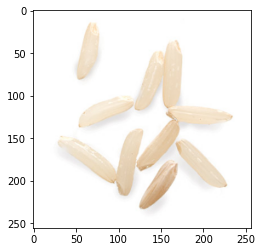

In [12]:
prediction = inv_name_mapping_dict[np.argmax(model.predict(temp_img)[0])]
print("Model prediction: {}".format(prediction))

# Display the predicted image
plt.imshow(img)
plt.show()

**Lets combine it in a function**

In [13]:
def test_func(model, img_size, img_name, class_name_mapping):
  img = plt.imread(img_name)
  img = cv2.resize(img, (img_size, img_size))

  temp_img = np.expand_dims(img, axis=0)
  
  prediction = class_name_mapping[np.argmax(model.predict(temp_img)[0])]
  print("Model prediction: {}".format(prediction))
  
  plt.imshow(img)
  plt.show()

Model prediction: Basmati


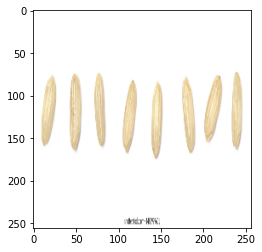

In [14]:
test_func(model, img_size=256, img_name='2.jpg', class_name_mapping=inv_name_mapping_dict)